In [ ]:
import numpy as np # lineer cebir
import pandas as pd # data işleme,cv dosyaları i/o

import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Flatten, Dropout
from keras.layers import Conv2D, AveragePooling2D,MaxPool2D,ZeroPadding2D
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import regularizers
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

#Hafta 11de functional apiden bahsedeceğiz.Ve image data generatörden bahsedeceğiz.

#Geneç hafta lenet yapısını gördük.Kerasta cnn yapısı oluştururken sequentinal model var bir de
# functional dediğimiz yöntemle model oluşturma var.
#Daha gelişmiş yapıları oluştururken functionalı tercih ediyoruz.
#Sequentinalda katmanları ekleyerek gidiyorduk
#Functional api daha farklı.Hangi katmanın hangi katmana bağlanacağı, hangi katmana
#ne giriş geleceği
#Yaptıkları iş aynı ancak functional api daha esnek model oluşturabiliyoruz.



<class 'PIL.JpegImagePlugin.JpegImageFile'>
<class 'numpy.ndarray'>
(1, 800, 1200, 3)
(1, 800, 1200, 3)
(1, 800, 1200, 3)
(1, 800, 1200, 3)
(1, 800, 1200, 3)
(1, 800, 1200, 3)


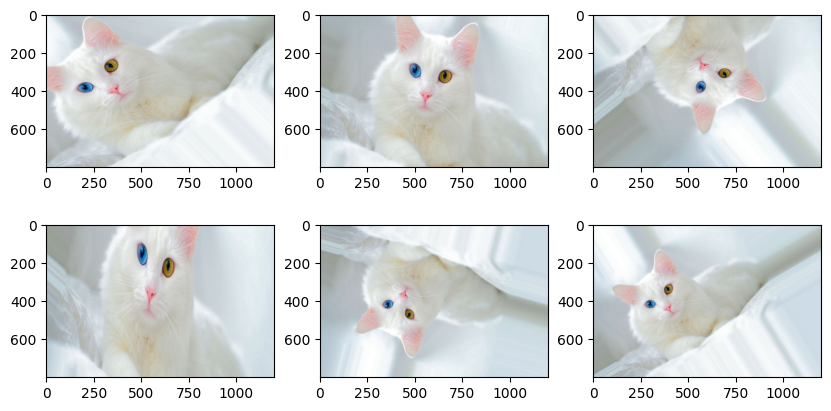

In [ ]:
from numpy import expand_dims

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,img_to_array

#Drive'a bağlanmamız lazım.

#Veriyi okumakla başlayalım.
img = load_img('./drive/MyDrive/kedi.jpg')

#Bu kedi görüntüsünü ImageDataGenerator kullanarak bunu çoğaltma yapacağız.
#Yani sentetik veri oluşturacağız.

#Bunu ImageDataGenerator'e verebilmek için array haline getirmemiz lazım.
#Bunu image_to_array denilen bir fonksiyon ile yapabiliriz.

print(type(img))
data=img_to_array(img)

#jpeg formatındaki bir görüntüyü np formatındaki bir arraya çeviriyor.
print(type(data))
data.shape

#Kaç tane veri var bunu verelim.
#data 0'a 1 tane veri eklemesini sağlayalım.
#Yani bir tane görüntü var demek istiyoruz.

# (1, 800, 1200, 3) demek 1 tane görüntü, 800 boyunda 1200 genişliğinde, 3 kanallı.
#Kaç tane görüntü olduğunu vermemiz lazım.

samples=expand_dims(data,0)
samples.shape

#Data generator oluşturalım.İstediğimiz gibi görüntü çoğaltma işlemi yapabiliriz.

dataGen = ImageDataGenerator(
    #45 derecelik açılarla döndür.
    rotation_range=45,
    vertical_flip=True,
    horizontal_flip=True,
    #zoom yapalım.
    zoom_range=0.5
)
#Artık data gen oluşturarak görüntüler oluşturabiliriz. Sonsuz tane oluşturabiliriz.

#flow fonksiyonu,bir diziye attığın listeye attığın görüntüleri ver demek.
#samples içerisinde görüntü var.Bunu alabilirsin diyerek veriyoruz.
#Batch_size ise kaçarlı kaçarlı görüntüler üreteyim diyor.1'er 1'er üret diyoruz.

it=dataGen.flow(samples,batch_size=1)

plt.figure(figsize=(20,10))

#range'nin içindeki sayıyı 12 yaparsak daha fazla görüntü gelecektir.
for i in range(12):
  batch=it.next()
  #2 satır 3 sütun, i+1 aralıklarla.
  plt.subplot(4,3,i+1)
  print(batch.shape)
  image=batch[0].astype('uint8')
  plt.imshow(image)
  plt.axis('off')

plt.show()

#Data augmentation yaparak, veriyi nasıl çoğalttığımızı,
#Data generatörün flow fonksiyonunu kullanarak, sampleslar yani örnekler içerisinde
#bu örneklerin nasıl çoğalttığını göstermiş olduk.
#Buna online data augmentation denir.Yani eğitim esnasında yapılan veri çoğaltma işlemi.
#zoom yapınca kedinin bir kısmı kaybolabilir.Zoomu çok yaparsak görüntüdeki veriyi
#bozmuş oluyoruz.Buna dikkat etmek lazım.
#45.00
#brightness_range, parlaklığı belli miktarda değiştirebiliyor.

#ImagedataGenerator farklı farklı, veri çoğaltmanın kullanılmasının yanında
#veriyi okumak içinde kullandığımız bir yöntem.Veriyi bizim yerimize klasörden okuyor.
#Normalde balık klasörüne girip tüm klasördeki balıkları tek tek okuyup hepsine
#sınıf ataması yapmamız lazım.Sonra 255'e böleceğiz,ölçekleyeceğiz.
#Klasörlerin isimlerine göre etiketleme yapacağız.

#Veriyi biz yüklemeye kalktığımızda hepsini rame yükleyemeyebiliyoruz.
#100 gb'lık veri olsun.Bütün train görüntülerini ve etiketlerini ram'e yükleyeceğiz.
#Tek tek okuyacağız, şeklini değiştireceğiz bir listeye atacağız.
#Sonra eğitime başlayabiliriz.Ama her zaman bu kadar yüksek ram olmayabilir.
#Pythonda Yield denilen bir kavram var.
#Return ve Yield. Return, fonksiyondan bir değer geri döndürmek istediğimizde
#kullandığımız bişey.Bir işlem yapılır sonucunu döndürür.
#Yield ise return yerine kullanılır,Ne işe yarar?
#Özellikle eğitimlerde ImagedataGenerator Yield kavramını kullanıyor.
#Veriyi rame yüklemek yerine, batchlar halinde eğitim yapıyoruz örneğin 32'lik batch
#diyorki, veriden 32 tanesini alayım geleyim hepsini rame yüklemeyim.Bir sonraki
#seferde diğer 32'yi alırım.Yani ihtiyacı olan kadarını gidip alıp geri geliyor.
#Return ise hepsini getirip rame yüklüyor.Ramden 32 32 alıyor.
#Yield ise hepsini rame yüklemiyor.İhtiyacı kadar olan batchı okuyor, sonra
#geri bırakıyor.Böylelikle daha etkin bir hafıza kullanmış oluyoruz.

#ImageDataGenerator ile veriyi okuyabilmek için, verinin belirli bir hazır
#bulunuşluk seviyesi olması lazım.Yani veriyi belli bir formata sokmuş olmamız gerekiyor.
#Ancak o zaman okuyabiliriz.ImageDataGenerator'ın bize sağlamış olduğu avantajlar var
#Eğitim esnasında veriyi çoğaltma imkanı, direk klasörlerden veriyi okuduğu için
#Veriyi etiketleri kendisi otomatik olarak atıyor.Biz etiketle uğraşmıyoruz.
#İstediğimiz batchlar halinde veriyi getirebiliyor.
#Bu yüzden ImageDataGenerator kullanıyoruz.

İlk olarak image data generatör ile veri okuma işlemi yapmak istiyorsak veriyi bir kere belirli bir organizasyon içerisine sokmamız lazım.
Bir üst klasörde ve alt klasörde sınıflara ayrılmış görüntüler olması lazım.
Bunun haricinde train,test ve validation içerisine bu klasörlerin ayrı ayrı atılmış olması lazım.
Yani verinin ayrılmış olması gerekiyor.
Tabi flow from directory yapacaksak yani bir directoryden veri okuyacaksak.

chest_xray datasetinde test ve train olarak veriler ayrılmış.Testin ve Trainin içinde veriler normal ve Pneumonia şeklinde ayrılmış.

Varsa bir train klasörü,validation klasörü ve test klasörünün altında görüntülerin ilgili etiketler altında gruplanmış olması lazım.

In [ ]:
train_path = './drive/MyDrive/Deep Learning/chest_xray/train'
test_path = './drive/MyDrive/Deep Learning/chest_xray/test'

#Validationu train esnasındada validation split yapabiliyorduk.Oradada bölebiliriz.

#Bazı görüntü işleme yöntemleri kullanabiliriz.En önemli kullandıklarımız;
#rescale etmek ölçeklemek.Bütün görüntüleri 0-1 arasına ölçekledik.
trainGen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    vertical_flip=True,
    horizontal_flip=True,
    zoom_range=0.5,
    validation_split = 0.1
)
#Train verisini eğitim esnasında çoğaltabiliriz.

#Validation datası üzerinde bir çoğaltma yapmak istemiyoruz.
#Sadece ölçekleyip bırakacağız.Çünkü validation verisi yani test verisi
#bu veriyle ilgili herhangi bir çoğaltma işleminde bulunmak istemiyoruz.

#Birde test generatörün üzerindede aynı şekilde bir veri çoğaltma işlemi uygulamayacağız.
#Ölçekleyip bırakacağız.

valGen=ImageDataGenerator(rescale=1./255)
testGen=ImageDataGenerator(rescale=1./255)

#Veri çoğaltıp çoğaltmayacağımızı, okurken üzerinde ne gibi işlemler yapacağımızı
#burada bildirdik.

#Bu aşamadan sonra ImageDataGenerator'un 3 farklı veri okuma yöntemi var.
#Flow,flow from directory, flow_from_dataframe şeklinde 3 farklı veri okuma yöntemi var.

#1.si flow: veri okuma fonksiyonu.Flow, bir listeye aldığımız, bütün görüntüleri
#okuruz, bir listeye atarız, liste içerisinden flow yaptırabiliriz yani okutabiliriz.
#Ama bunun anlamı yok listeye doldurduktan sonra zaten rami doldurmuş oluyoruz.
#Genelde flow_from_directory kullanıyoruz.Yani bir directory'den oku.
#Bir listeye atma, directoryden oku.

#Train generatör nereden okuyum diyor.Directory vereceğiz.Veriyi buradan oku diyoruz.
#train_path'den okuyacaksın diyoruz.Yolunu vermiş olduk.
#target_size fonksiyonu, yani hedef olarak görüntüler 28,28'lik görüntüler olsun istiyoruz.
#Lenetin girişine göre ayarlamaya çalışıyoruz çünkü leneti eğiteceğiz.
#classmode okuma türünü belirliyor.

trainData=trainGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    class_mode='binary',
    batch_size=8,
    color_mode='grayscale',
    subset='training'
)

#Çıktı olarak: İki sınıfa ait 5232 tane train içerisinde veri var.
#İki sınıfa ait 624 tanede test içerisinde veri var.
#Gerçektende testin ve trainin içerisinde 2 tane sınıfımız var.
#Kaç tane örnek var, hangi örnekten ne kadar var hepsini buluyor gösteriyor.

#target_size: Veriyi kaç boyutta okuduğumuz önemli.
#Küçük okursak detayları kaybedebiliriz.

#Bir de validation verisi ayıralım.

valData=trainGen.flow_from_directory(
    train_path,
    target_size=(224,224),
    class_mode='binary',
    batch_size=8,
    color_mode='grayscale',
    subset='validation'
)

testData=testGen.flow_from_directory(
    test_path,
    #test datayı 28 28 yapmıştık çok bozuk geldi görüntü.
    target_size=(224,224),
    class_mode='binary',
    color_mode='grayscale',
    batch_size=1
)

x,y=testData[602]
print(y.shape)
print(y)

#Class indislerini göster dediğimizde, normale 0 indisini atmış hastaya 1 indisini.
#Alfabetik olarak atıyor.
print(testData.class_indices)

#Test verisindeki 0 ve 1 etiketlerini görüyoruz.
print(testData.classes)
print(testData.class_indices)
print(testData.class_mode)

for i in range(6):
  img,y=testData.next()
  plt.subplot(2,3,i+1)
  print(img.shape)
  plt.imshow(img[0])
  plt.title(y[0])
  plt.axis('off')

plt.show()

#Burada önemli olan subsetler.Training ve validation olarak bunları mutlaka belirlemeliyiz.


Artık modelimizi eğitmeye geldi.Modelimizi bu iş için eğitelim. İki tane sınıfımız var.Modeli compile edip eğitim işlemimizi yapalım.

Aşağıdaki
output = Dense(1,activation='sigmoid')(x)
çıktı satırı 1 ve sigmoid olacak olacak.

In [ ]:

(X_train,y_train),(X_test,y_test) = mnist.load_data()

X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

X_train.shape


11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [ ]:
X_train = np.expand_dims(X_train,-1)

X_train.shape

#Artık (60000, 28, 28, 1) 28x28'lik 1 boyut olarak ayarladık.
#60.000 tane örneğimiz var. Her bir örneğin 28x28'lik tek boyut tek kanallı gri seviye görüntü
#olduğunu veriyi verirken söyleyeceğiz.

#Bunu test içinde yapalım.
X_test=np.expand_dims(X_test,-1)

y_train=to_categorical(y_train)

y_train[0]

In [ ]:
#LeNet-5

#Sequential bir sınıftı. Bu sınıftan bir tane nesne oluşturup,
#bu nesnenin içerisine bütün katmanlarımızı tek tek ekleyebiliyorduk.
model=Sequential()

#İlk katmanla başlayalım. Konvolüsyon 1 katmanı.
#2D dedikten sonra parantezde kullanılacak parametreler, filtre sayısı, kernelin
#büyüklüğü ne olsun,padding kullanacakmısın (same yaparsak otomatik padding kullanıyor)
#stride ne olsun, kernelleri ilk değerleri nasıl atayalım.Biasları nasıl atayalım ilk başta 0 olarak atıyor.

#LeNet'in yapısına baktığımızda ilk katmanda 6 tane filtre vardı.
#Filtreler 5x5'lik, stridelarıda 1e1'likti.
#6 tane filtre var.İlk parametre 6.
#Kernel boyutu 5x5.
#Stride'a 1,1 dediğimizde yana ve aşağı doğru kaymayı belirtir.
#1,2 dersek, yanlara doğru 1'er kayar, aşağı 2 olarak kayar.
#padding vermedik.
# ***Aktivasyon vermemiz lazım.Her bir konvolüsyon işleminden sonra aktivasyon yapmalıyız.
#Aktivasyon tanh çünkü ilk yapılarda sigmoid keşfedilmemiş, tanh kullanılıyor.

#Önemli. Bu ilk katman olduğu için input shape vermemiz lazım.
#Yani diyoruzki bu katmandan görüntüler yollayacağız ve bu görüntülerin boyutları 28x28x1 olacak.
#Böylelikle ilk konvolüsyon katmanımızı eklemiş olduk. Konvolüsyon blok diyelim buna.

model.add(Conv2D(6,kernel_size=(5,5),strides=(1,1),activation='tanh',input_shape=(28,28,1)))

#pooling

#Sonrasında average pooling geliyor.
#Pooling size'ın defaultu 2,2.Biz yine belirtelim.Yani 2 aşağı,2 yana inecek şekilde.
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))

#conv2

#Bir konvolüsyon işlemi daha var.
#Makaleye bakacak olursak c1,s2 aşamaları tamam. Artık c3 aşamasındayız.
#16 tane 5x5'lik filtreden bahsetmiştik.
#Yukarıdaki conv'u alıyoruz.Tek farkı burada input shape yok.

model.add(Conv2D(16,kernel_size=(5,5),strides=(1,1),activation='tanh'))

#pooling
model.add(AveragePooling2D(pool_size=(2,2),strides=(2,2)))


#Bu işlemden sonra bir pooling işlemi daha var.
#Görselde Subsampling-alt örnekleme yani pooling demek.
#Sonrasında 5x5'lik 16 tane filtre elde ettikten sonra bunu tam bağımlı katmanlara ekleyeceğiz.
#Burada 120'lik ve 84'lük iki tane tam bağımlı katman var. Bu katmanları ekleyerek devam edelim.

#Girdimiz 28 olduğu için girdi boyutu değişecek.Şekilde 32'ye göreydi.
#Padding vermeyi deneyebiliriz.Etrafına padding verip, girdi ve çıktıları ayarlayabiliriz.


#Elde ettiğimiz yapıları düzleştirmemiz, vektörel hale getirmemiz lazım.

#flatten
model.add(Flatten())

#Tam bağımlı katmanları ekleyeceğiz.
model.add(Dense(120,activation='tanh'))

#84'lük bir katman daha geliyor.
model.add(Dense(84,activation='tanh'))

#En sonda çıktı katmanımız var.
#Bu problem için son katmanda aktivasyon fonksiyonu softmaxtır.
#Çünkü, her bir görüntünün içinde birden fazla sayı yok.Her bir görüntüde 1 tane sayı var.
#Toplam sınıf adedimiz 10 tane.Çıktı en büyük olanı almamız gerekiyor.Hangi olasılık
#daha fazlaysa onu almamız gerekiyor. Yani bu durumda sigmoid hepsine büyük olasılıklar
#verebilir.0.5'in üstünde thresholdlar verebilir. O yüzden burada softmax kullanmamız lazım.

model.add(Dense(10,activation='softmax'))

model.summary()

#44 bin küsür parametre çıktı.Bizim çıktılarımızla LeNet'in özellik haritalarının
#çıktıları farklı. Onun çıktılarında ilk katmanda 28x28 çıkmış bizimki 24x24 çıkmış.
#Sebebi girişte bizim girdimiz 28'likti.
#LeNette girdiler 32x32'lik başladığı için, biz 28 olarak başlayınca sonuçların farklı olması normal.

#2x2'lik padding ekleyebiliriz.

#İlk katmanda modelde 156 tane parametre var.Bu 156 parametre nereden geliyor?
#5x5'lik 6 tane filtremiz var.5x5x6 = 150 yapar. 150 tane ağırlığımız var.
#Her bir filtreyede bir bias eklenmiş 156 olmuş.Yani 5x5x6 + 6 = 156

#Burada şuna dikkat edelim.Average pooling yapıldığı yerde parametre yok(0).
#Çünkü poolinglerde öğrenilecek bir şey yok.Yalnızca havuzlama işlemi yapılıyor.

#Sonrasında 8x8'lik 16 çıktı üreten filtrelerimiz var.
#5x5'lik 16 tane filtre vardı.+16 tane de bias vardı.Burada 2416 tane ağırlığımız var.

#Average poolingde yok.

#Flat ettikten sonra,(None, 256),256 diye bir sayı geldi.
#Bu 256 sayısı nereden geldi? Elimizde 4x4'lük 16 tane özellik haritası var.
#Bunları vektörel hale getirdiğimiz zaman 4x4x16 = 256 olarak flat edilmiş halde buraya geldi.

#Sonrasında 120'lik tam bağımlı katman, bu flat edilmiş katmanla bağlantılı.

#256*120 + 120 tane bias = 30840
#120*84 + 84 bias = 10164
#84*10+10 tane bias = 850 tane parametre var.

#Toplam parametre sayımız 44826.Biaslar ağırlıklar hepsi 44 bin parametre.

#Modelimizi derleyelim.Loss fonksiyonuna ihtiyacımız var.
#Nasıl bir loss kullanmalıyız.Kategorical cross entropy kullanacağız.
#Çünkü kategorik bir verimiz var.

#Sonrasında optimizere ihtiyacımız var.
#Birden fazla metriği takip edebiliyoruz.Accuracy'yi tercih edelim.
model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=['accuracy'])

#Batch size'ı 128 verdik hızlı olsun diye
#Bunu bi history'ye atalımki grafiğini de çizdirelim.

history = model.fit(X_train,y_train,batch_size=128,epochs=15,validation_split=0.1,validation_batch_size=128)


#önceki modele göre daha küçük bir model eğiteceğiz, daha az epok sayısıyla eğiteceğiz.
#bunları kategorik hale getirmezsek eğitim yapamayız.
#Yukarıda one hot encoding yapmamız gerekiyor.

In [ ]:
#Geçen hafta eğittiğimiz verinin 600 bin parametresi vardı.
#Şu an eğiteceğimiz model 44.000 parametresi var.

from keras.layers import Input
from keras.models import Model

#Function apide yapmamız gereken ilk şey girdi boyutlarımızı belirlemek.

#Inputun girdi boyutlarını girelim.28 28 1 girdik.3 boyutlu görüntümüz olsaydı,
#28 28 3 diyecektik.
#Yukarıdaki modelde inputu ilk konvolüsyon katmanının içerisinde veriyoduk.
#Burada girdiyi Input sınıfıyla temsil etmiş oluyoruz.

#Modelin girdileri ve görüntülerin boyutu farklı onu düzeltelim.
#input = Input(shape=(28,28,1)) # girdi

input = Input(shape=(224,224,1)) # girdi

#Katmanları tek tek eklemeye başlıyoruz. x buradaki katmanın çıktısı olacak.
#İlk katmanı yapıyoruz.
#İlk katmandaki kernel sayımız 6.Konvolüsyon katmanının aynısını veriyoruz.
#5,5'lik kernel.Stride default (1,1)

#Functional apide dikkat etmemiz gereken şey şu.Girdiler sağ köşeden alınır.
#Girdiyi vermemiz lazım.
#Diyoruz ki konvolüsyon2D,ilk konvolüsyon katmanı; sana input gönderiyorum.
#sende karşılığında bana x çıktıyı vereceksin.

x = Conv2D(6,kernel_size=(5,5),activation='tanh',strides=(1,1))(input)

#x katmanı çıktıyı temsil ediyor.
#Pool size (2,2).Stride verebiliyoruz sadece.Oda 2,2
#Pool size farklı olsaydı bunu değiştirecektik.
#Bu satırda bizden önceki katmandan gelen layerları istiyor.Bir önceki katmanı istiyor.
#Yani input sağdan geliyor, x'e veriyor.x geliyor average poolinge girdi veriyor.
#Average poolingde x'e tekrar çıktı veriyor.
#Sonrasında bunu tekrar edicez.
x = AveragePooling2D(strides=(2,2))(x)

x = Conv2D(16,kernel_size=(5,5),activation='tanh',strides=(1,1))(x)
x = AveragePooling2D(strides=(2,2))(x)

#x'ten gelen flatten diyoruz.
x = Flatten()(x)

x = Dense(120,activation='tanh')(x)

x = Dense(84,activation='tanh')(x)

#Son katman çıktıya output diyoruz.Yani çıktı.
output = Dense(1,activation='softmax')(x)

#Sonrasında modeli artık oluşturabiliriz.Modeli oluştururken isim veriyoruz.
#Model sınıfında inputsları istiyor.Sonra outputu yani çıktıyı istiyor.
#Bir modeli oluştururken birden fazla girdi ve çıktı kullanabiliyoruz.
#Bu esneklik sağlıyor ileriki derslerde göreceğiz.

model = Model(inputs=input,outputs=output)

#Modelin özetini alalım.
model.summary()

model.compile(loss="binary_crossentropy",optimzer="sgd",metrics=['accuracy'])

#Artık x_train y_train vermiyoruz.Val datayı üstte ayırdığımızı veriyoruz.
#history = model.fit(X_train,y_train,batch_size=128,epochs=15,validation_split=0.1,validation_batch_size=128)

history = model.fit(trainData,epochs=15,validation_data=valData)

#Bir hata aldık.Modelin girdileri ve çıktıları arasında fark var.
#Okuduğumuz görüntüler farklı, modelimizin girdileri farklı.

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 12, 12, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 4, 4, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 256)               0     

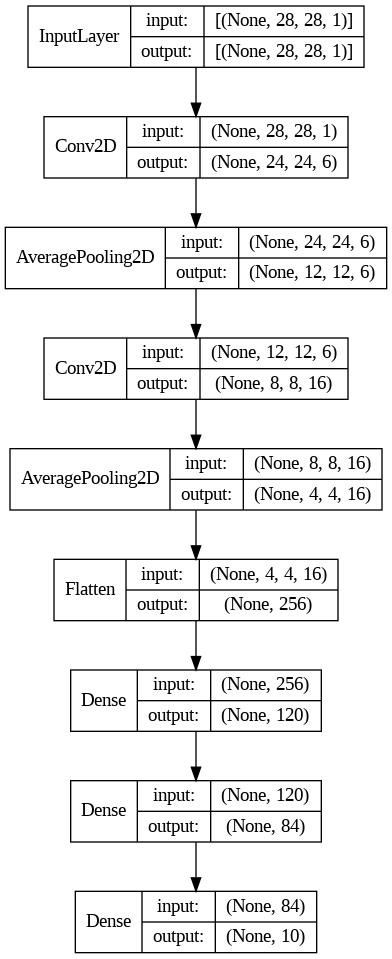

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model_plot.png',show_shapes=True,show_layer_names=False)

#İnput layer'ın 28-28-1 olduğunu söylüyor.

#Konvolüsyon katmanına verildiğinde 24-24-6'ya düştüğünü
#Konvolüsyonunun girdi ve çıktısını söylüyor.

#Avg poolingin girdisini ve çıktısını söylüyor.
#Katmanların birbiriyle olan bağlantılarını vs söylüyor.

#Functional apinin bize sağladığı esneklik: Birden fazla girdi, birden fazla çıktı
#ayarlayabiliyoruz.

#Inputu bir de konvolüsyona vermek istiyoruz diyelim. Başka bi yerden geleni başka
#bir yere vermek istiyorsak onuda yapabiliriz.

#Bu şekilde modeli görselleştirip, girdi ve çıktılarla ilgili bilgi sahibi olabiliriz.
